## Interactive map creation notebook

#### Final interactive map displays traffic volumes for street sections and Helsinki´s street network.

** **

**Traffic volumes data:** daily average of total motor vehicle flow in some street parts in Helsinki in 2019.

Traffic data from Helsinki. The maintainer of the dataset is Helsingin kaupunkiympäristön toimiala / Liikenne- ja katusuunnittelu. The dataset has been downloaded from Helsinki Region Infoshare service on 02.12.2021 under the license Creative Commons Attribution 4.0.
- Data contains average volumes of motor vehicles each autumn from 2010 onwards. Motor vehicles include passenger cars, vans, trucks, lorries, busses and motor bikes.
- Note: original csv file had to be saved with UTF-8 encoding before using in code

** **

**Street network data and Sea area data**

Data is derived from City of Helsinki WFS-service.

Source and information about the data (in Finnish): https://www.hel.fi/helsinki/fi/kartat-ja-liikenne/kartat-ja-paikkatieto/Paikkatiedot+ja+-aineistot/avoimet+paikkatiedot/

Data used to create the  map:
- Main roads (Seutukartta_liikenne_paatiet)
- Sea area (Seutukartta_maankaytto_merialue)

In [1]:
# Import needed modules
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyproj import CRS

In [11]:
# Read in traffic volume data
traf_fp = "hki_liikennemaarat.csv"
traffic = pd.read_csv(traf_fp, sep=";")

# Inspect data
traffic.head()

,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot
0,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2010,60,4,1,0,4,0,0,69
1,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2010,35,3,1,0,2,0,0,41
2,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2010,17,1,0,0,1,0,0,19
3,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2010,17,1,0,0,1,0,0,19
4,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2010,36,2,0,0,2,0,0,40


In [17]:
# Convert into GeoDataFrame
traffic = gpd.GeoDataFrame(traffic, geometry=gpd.points_from_xy(traffic.x_gk25, traffic.y_gk25))

# Select latest available year for analysis (2019)
traffic = traffic.loc[(traffic['vuosi'] == 2019)]

# Check result
traffic

,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot,geometry
43092,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2019,22,1,0,0,1,0,0,24,POINT (25494426.000 6672169.000)
43093,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2019,20,2,0,0,1,0,0,23,POINT (25494426.000 6672169.000)
43094,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2019,21,1,0,0,1,0,0,23,POINT (25494426.000 6672169.000)
43095,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2019,16,1,0,0,1,0,0,18,POINT (25494426.000 6672169.000)
43096,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2019,16,1,0,0,1,0,0,18,POINT (25494426.000 6672169.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47875,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,1900,2019,100,8,0,0,0,4,0,108,POINT (25512755.000 6683217.000)
47876,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2000,2019,52,4,0,0,0,0,0,56,POINT (25512755.000 6683217.000)
47877,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2100,2019,24,4,0,0,0,0,0,28,POINT (25512755.000 6683217.000)
47878,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2200,2019,12,0,0,0,0,0,0,12,POINT (25512755.000 6683217.000)


In [24]:
# Define CRS for traffic data (GK25 = epsg:3879)
traffic.crs = CRS.from_epsg(3879)

In [22]:
"""
Create total sum of all vehicles for each street section.
"""

# Group by street section ID ("piste")
grouped = traffic.groupby(['piste'])
grouped.head()



,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot,geometry
43092,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2019,22,1,0,0,1,0,0,24,POINT (25494426.000 6672169.000)
43093,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2019,20,2,0,0,1,0,0,23,POINT (25494426.000 6672169.000)
43094,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2019,21,1,0,0,1,0,0,23,POINT (25494426.000 6672169.000)
43095,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2019,16,1,0,0,1,0,0,18,POINT (25494426.000 6672169.000)
43096,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2019,16,1,0,0,1,0,0,18,POINT (25494426.000 6672169.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47796,F06,UUSI PORVOONTTIE,25512755,6683217,1.0,0,2019,4,0,0,0,0,0,0,4,POINT (25512755.000 6683217.000)
47797,F06,UUSI PORVOONTTIE,25512755,6683217,1.0,100,2019,4,0,0,0,0,0,0,4,POINT (25512755.000 6683217.000)
47798,F06,UUSI PORVOONTTIE,25512755,6683217,1.0,200,2019,4,0,0,0,0,0,0,4,POINT (25512755.000 6683217.000)
47799,F06,UUSI PORVOONTTIE,25512755,6683217,1.0,300,2019,4,0,0,0,0,0,0,4,POINT (25512755.000 6683217.000)


In [20]:
"""
Read in data layers from WFS-service.
Keep only needed columns.
"""

# helsinki road network
url = "https://kartta.hel.fi/ws/geoserver/avoindata/wfs?SERVICE=WFS&VERSION=1.1.0&REQUEST=GetFeature&TYPENAME=avoindata:Seutukartta_liikenne_tiesto&OUTPUTFORMAT=json"
roads = gpd.read_file(url)
roads = roads[['geometry', 'nimi', 'tieluokka_nro']]

# Sea area
url = "https://kartta.hel.fi/ws/geoserver/avoindata/wfs?SERVICE=WFS&VERSION=1.1.0&REQUEST=GetFeature&TYPENAME=avoindata:Seutukartta_maankaytto_merialue&OUTPUTFORMAT=json"
sea = gpd.read_file(url)
sea = sea['geometry']

In [112]:
# Check that data´s CRS´s match
roads.crs == areas.crs == buildings.crs

True

In [114]:
# Join buildings to postal code areas using spatial join
joined = gpd.sjoin(areas, buildings, how="left")

# Check result
joined

,tunnus,geometry,index_right,id
0,00440,"POLYGON ((25492544.785 6680222.835, 25492467.3...",20699,20678
0,00440,"POLYGON ((25492544.785 6680222.835, 25492467.3...",11088,11084
0,00440,"POLYGON ((25492544.785 6680222.835, 25492467.3...",29154,29151
0,00440,"POLYGON ((25492544.785 6680222.835, 25492467.3...",38113,38113
0,00440,"POLYGON ((25492544.785 6680222.835, 25492467.3...",38119,38119
...,...,...,...,...
83,00550,"POLYGON ((25496941.575 6676429.337, 25496945.8...",36635,36635
83,00550,"POLYGON ((25496941.575 6676429.337, 25496945.8...",7198,7196
83,00550,"POLYGON ((25496941.575 6676429.337, 25496945.8...",6043,6042
83,00550,"POLYGON ((25496941.575 6676429.337, 25496945.8...",36290,36290


In [115]:
# Calculate the number of buildings in each postal code area
count = joined.groupby(['tunnus']).size().to_frame('size')

# New variable for postal code areas with calculated numbers of buildings
buildnum = areas.join(count, on=['tunnus'])

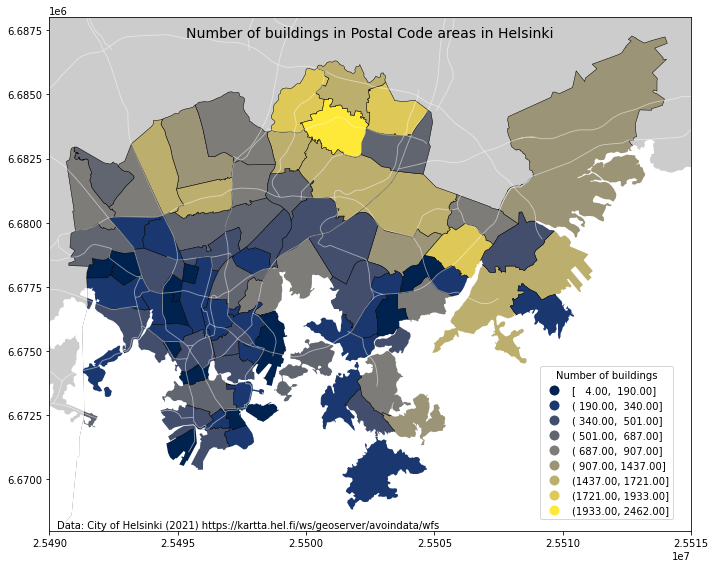

In [116]:
"""Plot the map"""

# Size and background color
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor((0.8, 0.8, 0.8))

# Visualize the number of buildings into 9 classes using "Natural Breaks" classification scheme
buildnum.plot(ax=ax, column="size", 
              cmap="cividis", 
              linewidth=0.5, 
              edgecolor="k", 
              scheme="NaturalBreaks", 
              k=9, 
              legend=True)


# Add sea and roads for visualization
sea.plot(ax=ax, color="w")
roads.plot(ax=ax, color="w", linewidth=0.9, alpha=0.5)

# Set map limits
ax.set_xlim(25490000, 25515000)
ax.set_ylim(6668000, 6688000)

# Set legend location, title and credits
ax.get_legend().set_bbox_to_anchor((0.98, 0.33))
ax.get_legend().set_title("Number of buildings")
ax.set_title("Number of buildings in Postal Code areas in Helsinki", fontsize=14, y=0.95)
ax.text(25490300, 6668100, "Data: City of Helsinki (2021) https://kartta.hel.fi/ws/geoserver/avoindata/wfs", fontsize=10)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)